# Bias, Variance, and Cross Validation 

We have been discussing cross-validation, with Bias and Variance for the diagnosis of algorithm so lets dig deeper to explore the universe of hyper-parameters including the regularization parameter.

The bottom line is we would like to find a model which has an appropriate mix of bias and variance. We usually want to sit at the point of the tradeoff between the two: be simple but no simpler than necessary.

Recall from the lecture that, we do not want a model with too much variance: it would not generalize well. This phenomenon is also called *overfitting*. There is no point doing prediction if we cant generalize well. At the same time, if we have too much bias in our model, we will systematically underpredict or overpredict values and miss most predictions. This is also known as *underfitting*.

Cross-Validation provides us a way to find the "hyperparameters" of our model, such that we achieve the balance point.

In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In any learning problem, or goal is **to minimize the prediction error on the test set**. This prediction error could be a root mean square error, or a 1-0 loss function, or a log likelihood, or something else like hinge loss.

##Polynomial regression

You have already implemented the linear regression, now update it with the regularization included and update the code.

Recall the cost function in case of the linear regression was.


$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(y^{(i)}-h_\theta(x^{(i)}))^2+\lambda \frac{1}{2}\sum_{i=1}^k \theta_k^2$$


In [2]:
np.random.seed(42)

#Task-1 Implement the regularized linear regression Using gradient Descent

In [3]:
def GradientDescent(X,Y,cost_function,derivative_cost_function,maxniter=20000, alpha=0.01, plotcf=True):
    '''
        Finds the minimum of given cost function using gradient descent.
        
        Input:
        ------
            X: can be either a single n X d-dimensional vector 
                or n X d dimensional matrix of inputs            
            
            Y: Must be n X 1-dimensional label vector
            cost_function: a function to be minimized, must return a scalar value
            derivative_cost_function: derivative of cost function w.r.t. paramaters, 
                                       must return partial derivatives w.r.t all d parameters
                                       
            maxniter: maximum number of iterations to run
            alpha: learning rate
            plotcf: If true, plots cost function after every 20 iterations
                    
        Returns:
        ------
            thetas: a d X 1-dimensional vector of cost function parameters 
                    where minimum point occurs (or location of minimum).
    '''
    
    # Remember you must plot the cost function after set of iterations to
    # check whether your gradient descent code is working fine or not...
    eps=0.00001
    #print X.shape
    np.random.seed(seed=99)
    nexamples=float(X.shape[0])
    thetas=rand(X.shape[1],1)
    #print thetas

    #Your code goes here
    # print cf
    cf = [cost_function(X,Y,thetas)]
    i = 0 
    while i<maxniter:
        thetas=thetas-(alpha*derivative_cost_function(X,Y,thetas))
        cf.append(cost_function(X,Y,thetas))
        if abs(cf[-1]-cf[-2])<=eps: 
            break
        i += 1
    #print theta_new
    theta_new=thetas
    print 'Value of Cost Function at Minimum Points {}, is {}'.format(theta_new,cf[-1])
    return theta_new

In [4]:
# A placeholder class 
# TODO: You have to implement the following class

### import pdb
## Your code goes here...
# You might need to define auxliary classes for composition.. ?

class LinearRegression:
    ''' Implements the LinearRegression For Classification... '''
    
    def __init__(self,lembda=5,alpha=0.001,maxniter=20000, scalefeatures=False,skipfeat=-1):     
        """
            lembda= Regularization parameter...
            scalefeatures (boolean)= scale the features
        """
        self.theta=[] # learned set of parameters
        self.scalefeatures=scalefeatures
        self.lembda=lembda
        self.alpha=alpha
        self.maxniter=maxniter
        self.smin=-3 # scale the features between these values[-3,3]
        self.smax=3
        self.skipfeat=skipfeat # feature to skip during scaling...
        pass

    
    def hypothesis(self, X,theta):
        '''
            Computes the hypothesis for over given input examples (X) and parameters (thetas).

            Input:
                X: can be either a single n X d-dimensional vector or n X d dimensional matrix
                theta: Must be a d-dimensional vector
            Return:
                The computed hypothesis
        '''
        
        #Your code goes here
        h= X.dot(theta)
        return h
    
    def cost_function(self, X,Y, theta):
        '''
            Computes the Cost function for given input data (X) and labels (Y).

            Input:
                X: can be either a single n X d-dimensional vector or n X d dimensional matrix of inputs
                theata: must  d X 1-dimensional vector for representing vectors
                Y: Must be n X 1-dimensional label vector
                
            Return:
                Returns the cost of hypothesis with input parameters 
        '''
    
        #Your code goes here
        preds=self.hypothesis(X, theta)
        datacost=(np.sum((preds-Y)**2))*(1./(2*X.shape[0]))
        paramscost=np.sum(theta**2)*self.lembda*(1./2)
        cost=datacost+paramscost
        assert (cost>0)
        return cost
    
    def derivative_cost_function(self,X,Y,theta):
        '''
            Computes the derivates of Cost function w.r.t input parameters (thetas)  
            for given input and labels.

            Input:
            ------
                X: can be either a single n X d-dimensional vector or n X d dimensional matrix of inputs
                theata: must  d X 1-dimensional vector for representing vectors
                Y: Must be n X 1-dimensional label vector
            Returns:
            ------
                partial_thetas: a d X 1-dimensional vector of partial derivatives of cost function w.r.t parameters..
        '''
        nexamples=float(X.shape[0])

        
        #Your code goes here
        preds=self.hypothesis(X, theta)-Y
        dtheta=X.T.dot(preds)/float(nexamples)
        dtheta = dtheta + (self.lembda*theta)
        return dtheta
        #return partialderivatives

    def train(self, X, Y):
        ''' Train LinearRegression classifier using the given 
            X [m x d] data matrix and Y labels matrix
            
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            
            Returns:
            -----------
            Nothing
            '''
        #scale feature every time before training...
        self.reset=True

        nexamples,nfeatures=X.shape
        ## now go and train a model for each class...
        if self.scalefeatures:
            X=self.scale_features(X)
      
        #Your code goes here
        #X,Y,cost_function,derivative_cost_function,maxniter=20000, alpha=0.01, plotcf=True
        self.theta=GradientDescent(X,Y, self.cost_function, self.derivative_cost_function)
    
    def predict(self, X):
        
        """
        Test the trained perceptron classifier result on the given examples X
        
                   
            Input:
            ------
            X: [m x d] a matrix of m  d-dimensional test examples.
           
            Returns:
            -----------
                pclass: the predicted class for the given set of examples, i.e. to which it belongs
        """
        
        num_test = X.shape[0]
        
        
        if len(self.theta)-X.shape[1] ==1:
            # append 1 at the end of each example for the bias term
            X=np.hstack((X,np.ones((X.shape[0],1))))
        
        if self.scalefeatures:
            X=self.scale_features(X)

        
        
        #Your code goes here
        res=X.dot(self.theta)
        return res
    
    
    def scale_features(self,iX):
        """
            Normalize each feature to lie in the range [0 ,1]

            Input:
            ------

                iX= M x d dimensional data matrix

            Returns:
            --------

                normalized X
        """
        X=iX[:,:self.skipfeat]
        
        if self.reset:
            self.xmin= np.min(X,axis=0)
            self.xmax= np.max(X,axis=0)
            self.reset=False

        X= ((X-self.xmin)/(self.xmax-self.xmin))*(self.smax-self.smin)+self.smin
        
        iX[:,:self.skipfeat]=X
        return iX


Consider the model selection problem: what degree of polynomial you want to fit: `d`. It acts like a hyperparameter, in the sense that it is a second parameter that needs to be fit for. Once you set it, you still have to fit the parameters of your linear or polynomial or elsewise model.

In [5]:
def generate_curve(x, sigma):
    #return np.random.normal(10 - 1. / (x + 0.1), sigma)
    return np.power(x,2)+np.random.normal(scale=sigma,size=x.shape)


#### Now your goal is to write code for fitting different type of linear and non-linear polynomials to the given dataset,


Finish the missing part in the code given above and then test it using different types of polynomials and plots the result on the same plot for different polynomials. The degree (d) of polynomials you can try include 1,2,3,4,6.

Report the mean squared error for each fitting.


A high bias situation is one in which we underfit. Notice how for low d, the `rmse` on the training set remains high. A high variance situation is one in which we overfit. We want to be just right. As we get to the limit of being able to completely fit the points, the mse training error goes to nil.

### Constructing a data set

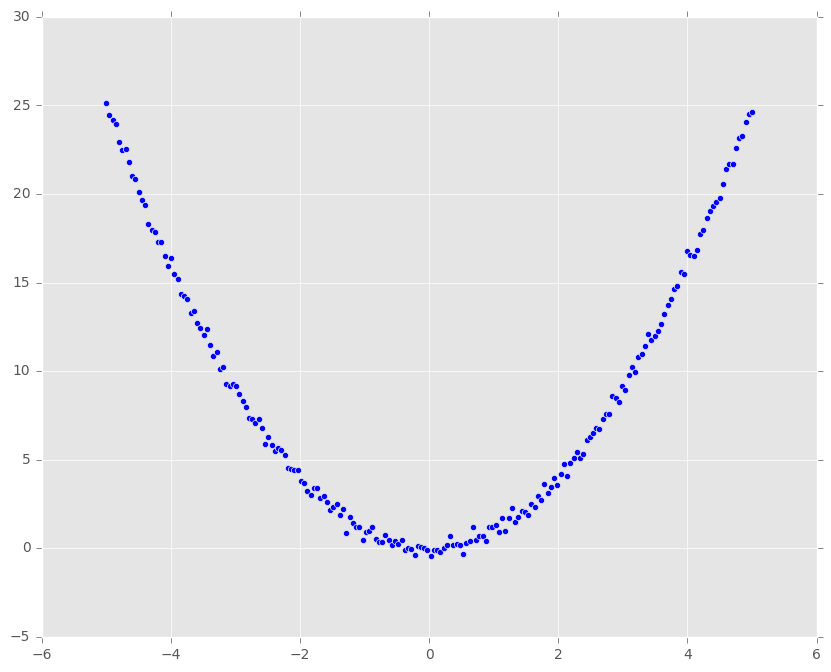

In [6]:
N = 200
intrinsic_error=0.3
#X = np.random.random(N).reshape((N,1))
X=np.linspace(-5,5,N).reshape((N,1))
Y = generate_curve(X, intrinsic_error).reshape((N,1))
plt.scatter(X,Y)

In [7]:
print X.shape, Y.shape

(200, 1) (200, 1)


In [8]:
X=np.hstack((X,ones((X.shape[0],1))))

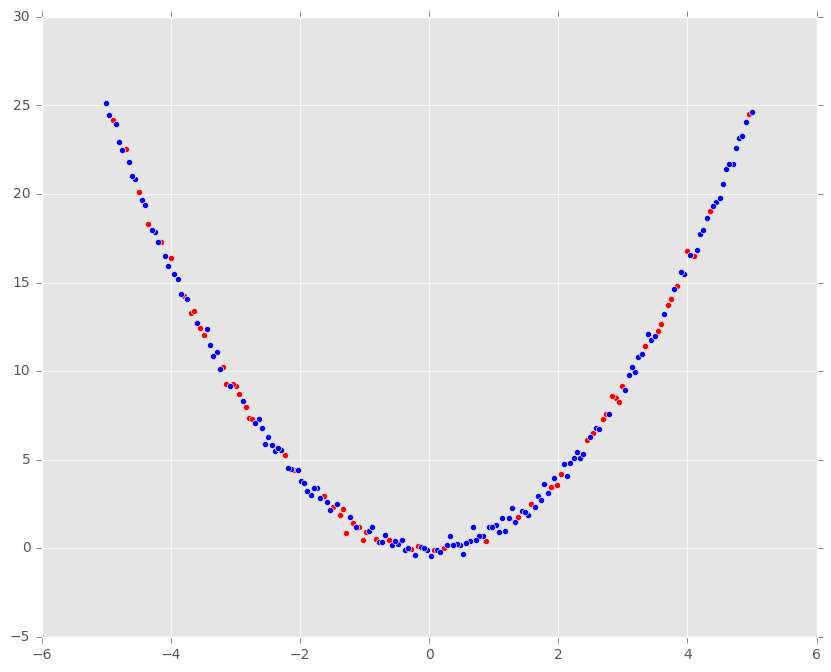

In [9]:
#Now go and split the training into 60-40 ratio for training and valiation set.

# Train the regressors with increasing degree  and calculate the mean square error and plot, 
idx=np.arange(0,N)
np.random.shuffle(idx)
per=0.6

trainidx=idx[:int(per*100)]
testidx=idx[int(per*100):]
Xtrain, Ytrain=X[trainidx], Y[trainidx]
Xtest, Ytest=X[testidx], Y[testidx]
# print Xtrain,Ytrain

plt.scatter(Xtrain[:,0],Ytrain,c='r')
plt.scatter(Xtest[:,0],Ytest,c='b')

In [10]:
def add_powers(X,polydegree=3):
    """
        add higher order powers to the features...
    """
    #offset=X[:,:-1]
    if polydegree==1:
        return X
    
    nX=np.ones((X.shape[0],polydegree+1))
    nX[:,0]=X[:,0]
    for k in range(polydegree-1):
        nX[:,k+1]=X[:,0]**(k+2)
    
    return nX


In [11]:
# to get a plot as given below
lr=LinearRegression(lembda=0.,alpha=0.01,maxniter=1000,scalefeatures=True)

In [12]:
#
def test_derivative(X,Y,cost_function,derivative_cost_function):
    """
        Function test the implementation of the derivative function...
        X: Input test examples (m x d)
        Y: True labels (m x 1)
        cost_function: function used to compute cost function...
        derivative_cost_function: function used to compute derivative of the cost function...
    """
    thetas=np.random.rand(X.shape[1],1)
    ad=derivative_cost_function(X,Y,thetas)
    print ad
    eps=0.0001
    cd=[]

    for i in range(len(thetas)):
        ttpe=thetas.copy()
        ttpe[i]=ttpe[i]+eps # add an epsilon for the current theta
        ttme=thetas.copy()
        ttme[i]=ttme[i]-eps # add an epsilon for the current theta
        print 'diff in direction', ttpe-ttme    
        cd.append((cost_function(X,Y,ttpe)-cost_function(X,Y,ttme))/(2*eps))

    print 'Computational derivatvie =',cd
    print 'Analytical derivabtive =', ad.shape,ad.T
    print 'Their difference=',np.reshape(cd,ad.shape)-ad

In [13]:

nX=add_powers(X,3)
test_derivative(nX,Y,lr.cost_function,lr.derivative_cost_function)

[[  121.09675024]
 [  -83.28180948]
 [ 2164.57791429]
 [   -5.32176763]]
diff in direction [[ 0.0002]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]]
diff in direction [[ 0.    ]
 [ 0.0002]
 [ 0.    ]
 [ 0.    ]]
diff in direction [[ 0.    ]
 [ 0.    ]
 [ 0.0002]
 [ 0.    ]]
diff in direction [[ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.0002]]
Computational derivatvie = [121.09675023566524, -83.281809484105906, 2164.5779142852462, -5.321767625900975]
Analytical derivabtive = (4, 1) [[  121.09675024   -83.28180948  2164.57791429    -5.32176763]]
Their difference= [[ -6.05282935e-10]
 [ -5.80371307e-11]
 [  2.04636308e-10]
 [  1.53555391e-10]]


In [14]:
print nX[argmax(nX[:,0]),:]

[   5.   25.  125.    1.]


In [15]:
lr.train(nX.copy(),Y)

Value of Cost Function at Minimum Points [[ -0.01992503]
 [  4.15348441]
 [  0.0464994 ]
 [ 12.45038029]], is 0.039802512522


In [16]:
ypred=lr.predict(nX.copy())

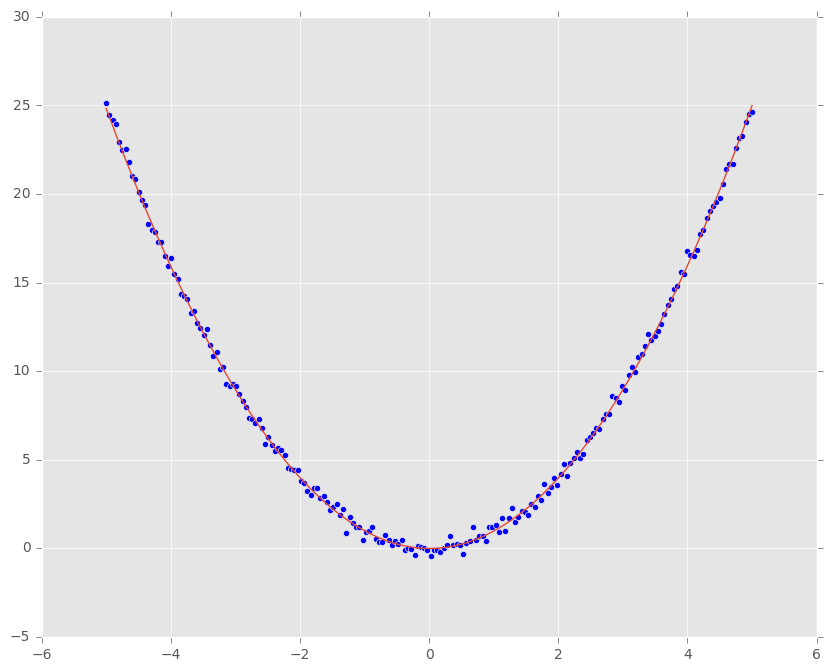

In [17]:
plt.plot(X[:,0],ypred)
plt.scatter(X[:,0],Y)

In [18]:
nX=add_powers(X,3)

## Now increase with complexity of model to power 5 and play with $\lambda$, regularization parameter

In [19]:
res=[]
# Write code of playing  with lambda, train the regressors with following lambdas and plot the result and discuss
#on overfitting vs underfitting
lembdas=[0.00001,0.001,0.1,1,5,10]
#def __init__(self,lembda=5,alpha=0.001,maxniter=20000, scalefeatures=False,skipfeat=-1):     
for l in lembdas:
    lr=LinearRegression(lembda=l, scalefeatures=True)
    lr.train(nX.copy(),Y)
    ypreds=lr.predict(nX.copy())
    res.append((l, lr, ypreds))


Value of Cost Function at Minimum Points [[ -0.01992163]
 [  4.1534351 ]
 [  0.04649405]
 [ 12.4502095 ]], is 0.0406683126699
Value of Cost Function at Minimum Points [[ -0.01977784]
 [  4.14841967]
 [  0.04626513]
 [ 12.43282403]], is 0.12628454237
Value of Cost Function at Minimum Points [[ -5.45315716e-03]
 [  3.71144111e+00]
 [  2.34680331e-02]
 [  1.09236873e+01]], is 7.65238381878
Value of Cost Function at Minimum Points [[  6.28722961e-03]
 [  1.99173645e+00]
 [  2.48999314e-03]
 [  5.16410585e+00]], is 36.533824183
Value of Cost Function at Minimum Points [[ 0.00322233]
 [ 0.74074015]
 [ 0.00208829]
 [ 1.51725623]], is 55.2665816649
Value of Cost Function at Minimum Points [[ 0.00216206]
 [ 0.43114774]
 [ 0.00189169]
 [ 0.80036116]], is 59.1210421807


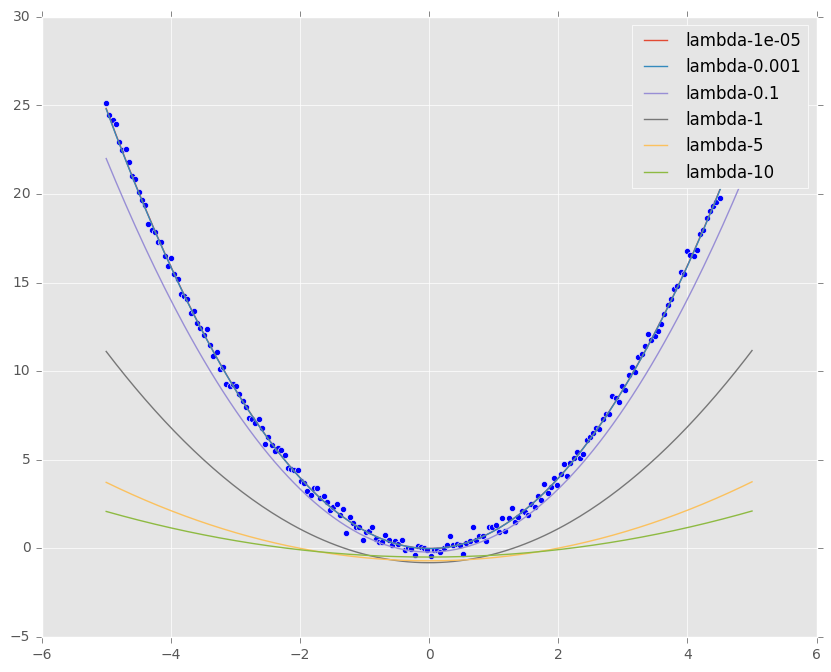

In [20]:
# to get a plot as given below
idx=np.argsort(X[:,0])
for c in res:
    plt.plot(nX[idx,0],c[2][idx])
    #plt.show()
plt.scatter(X[:,0],Y)
legends=['lambda-'+str(data[0]) for data in res]
plt.legend(legends)

## Playing with multiple degree polynomial

In [22]:
##

# Write code of playing  with polynomial degree, train the regressors of following degrees
#[1,2,3,4,5,6] and plot the curves using code given below...
##
res=[]
degs=np.arange(1,7)
for deg in degs:
    nX=add_powers(X,polydegree=deg)
    lr=LinearRegression(scalefeatures=True)
    lr.train(nX.copy(), Y)
    preds=lr.predict(nX.copy())
    res.append((deg, lr, preds))

Value of Cost Function at Minimum Points [[ 0.00484468]
 [ 1.39606431]], is 57.762390638
Value of Cost Function at Minimum Points [[ 0.00484468]
 [ 0.74072296]
 [ 1.51727475]], is 55.2665726824
Value of Cost Function at Minimum Points [[ 0.00322233]
 [ 0.74074015]
 [ 0.00208829]
 [ 1.51725623]], is 55.2665816649
Value of Cost Function at Minimum Points [[ 0.00274431]
 [ 0.95796577]
 [ 0.00302432]
 [-0.46244016]
 [ 1.41824213]], is 54.3739052922
Value of Cost Function at Minimum Points [[  2.57634261e-03]
 [  9.58696501e-01]
 [  1.84712397e-03]
 [ -4.63304159e-01]
 [  6.79206389e-04]
 [  1.41732552e+00]], is 54.3738957492
Value of Cost Function at Minimum Points [[  3.00893434e-03]
 [  1.17024660e+00]
 [  1.53208781e-03]
 [ -1.05435991e-01]
 [  1.36789810e-04]
 [ -8.38466158e-01]
 [  1.26341772e+00]], is 51.7155985639


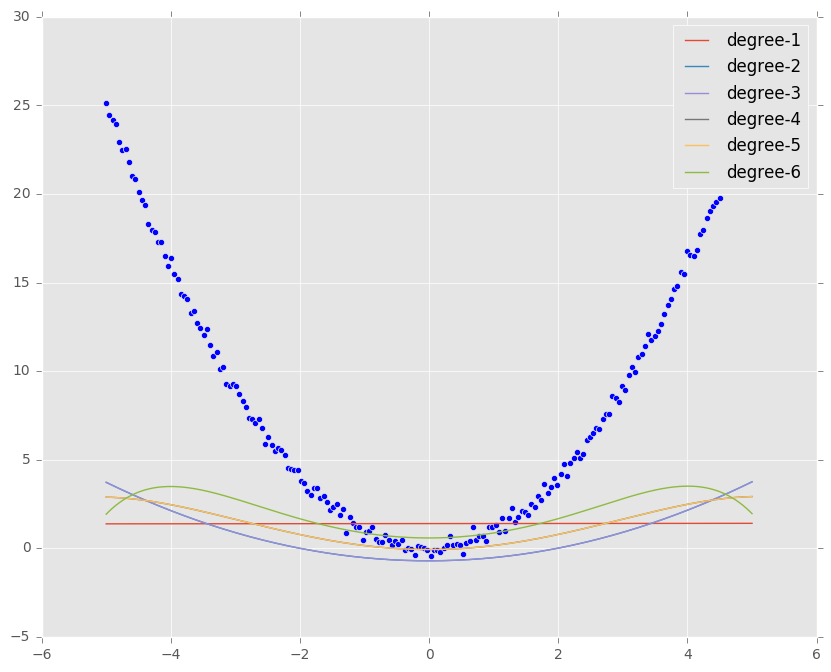

In [23]:
# to get a plot as given below
idx=np.argsort(X[:,0])
for c in res:
    plt.plot(X[idx,0],c[2][idx])
plt.scatter(X[:,0],Y)
legends=['degree-'+str(data[0]) for data in res]
plt.legend(legends)

# Overfitting vs Underfitting Diagnosis

In [24]:
def mse(ytrue,ypred):
    """
        mean square error between prediction and original solution.
    """ 
    
    return (np.mean((ytrue - ypred) ** 2))

In [31]:
# Now go and write code for finding the best degree polynomial, i.e. with minimum error
# on the test (validation) set, you should store training and test errors for each 
# different degree of polynomial...


res=[]
trnerror=[]
tsterror=[]
degs=[1,2,3,4,5,6,7,8,9,10,40]
for k in degs:

    #write your code here
    nXtrain=add_powers(Xtrain, polydegree=k)
    nXtest=add_powers(Xtest, polydegree=k)

    lr=LinearRegression(scalefeatures=True)
    lr.train(np.copy(nXtrain), Ytrain)
        
    ypredtrain=lr.predict(np.copy(nXtrain))
    ypredtest=lr.predict(np.copy(nXtest))
    #
    trainerror=mse(ypredtrain,Ytrain)
    testerror=mse(ypredtest,Ytest)
    trnerror.append(trainerror)
    tsterror.append(testerror)
    print "For Degree={}, Train Error={}, Test Error={}".format(k,trainerror,testerror)
    res.append([k,lr, ypred, trainerror,testerror])
    

Value of Cost Function at Minimum Points [[-0.22182327]
 [ 1.41193906]], is 52.4665407034
For Degree=1, Train Error=94.719193991, Test Error=110.376719684
Value of Cost Function at Minimum Points [[-0.21857276]
 [ 0.52377891]
 [ 1.49131164]], is 51.3185731491
For Degree=2, Train Error=89.9065022982, Test Error=101.494741842
Value of Cost Function at Minimum Points [[-0.16851584]
 [ 0.52038046]
 [-0.23506752]
 [ 1.48787894]], is 51.1549675222
For Degree=3, Train Error=89.4687656137, Test Error=101.843892031
Value of Cost Function at Minimum Points [[-0.16514405]
 [ 0.81966636]
 [-0.23398752]
 [-0.69298784]
 [ 1.32513235]], is 49.1454565624
For Degree=4, Train Error=83.3404953372, Test Error=100.845463322
Value of Cost Function at Minimum Points [[-0.13501589]
 [ 0.81765053]
 [-0.20844366]
 [-0.6925655 ]
 [-0.24399348]
 [ 1.31952147]], is 48.9779439238
For Degree=5, Train Error=82.9031522626, Test Error=101.11999399
Value of Cost Function at Minimum Points [[-0.12790163]
 [ 1.04155786]
 

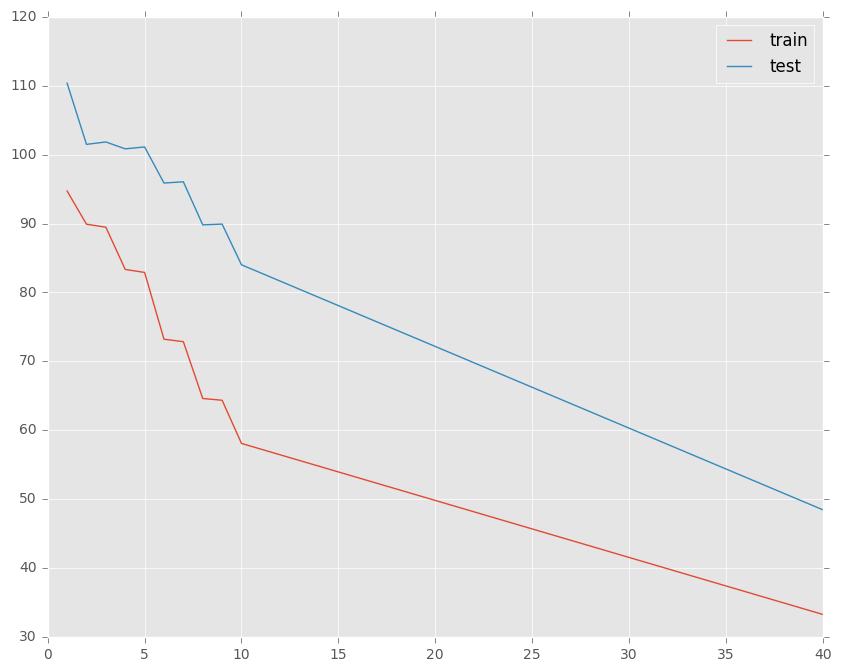

In [32]:
plt.plot([1,2,3,4,5,6,7,8,9,10,40],trnerror)
plt.plot([1,2,3,4,5,6,7,8,9,10,40],tsterror)
plt.legend(['train','test'])

How to tell that a hypothesis is overfitting? Its not enough that the training error is low, though thats certainly an indication.

The training error is low but test error is high!

If we plot training error against, say, d, the training error will decrease with increasing d. But for the validation, we'll have an error curve which has a minumum and goes up again.




####What is the best degree of Polynomial for given data...

In [34]:
#find the best degree based on the above analysis
bestdeg=degs[np.argmin(np.asarray(tsterror))]
print 'best degree polynomial (achieving minimum test set error) = {}'.format(bestdeg)

best degree polynomial (achieving minimum test set error) = 40


###Learning Curves

Now plot the train vs validation error as a function of the size of the training set.

The training set error increases as size of the data set increases. The intuition is that with more samples, you get more variance. The  validation error on the otherhand will decrease as **training set** size increases, as  more data you have better the hypothesis you fit.



/home/muneebaadil/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/muneebaadil/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/muneebaadil/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/muneebaadil/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


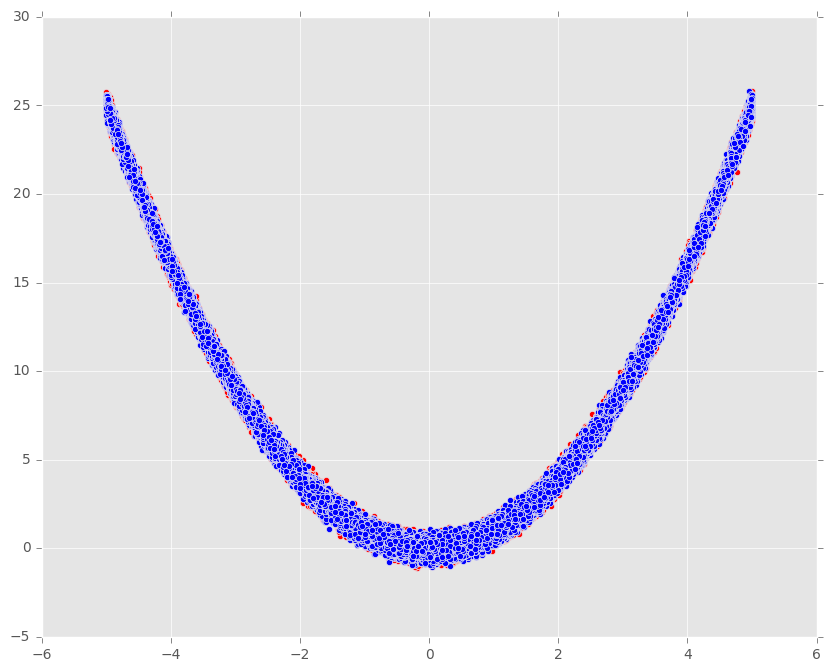

In [35]:
N = 200000
intrinsic_error=0.3
#X = np.random.random(N).reshape((N,1))
X=np.linspace(-5,5,N).reshape((N,1))
Y = generate_curve(X, intrinsic_error).reshape((N,1))
plt.scatter(X,Y)

idx=np.arange(0,N)
np.random.shuffle(idx)
per=0.6
Xtrain=X[idx[:N*per],:]
Ytrain=Y[idx[:N*per]]
Xtest=X[idx[N*per:],:]
Ytest=Y[idx[N*per:]]
# print Xtrain,Ytrain

plt.scatter(Xtrain[:,0],Ytrain,c='r')
plt.scatter(Xtest[:,0],Ytest,c='b')


Automatic pdb calling has been turned OFF
Value of Cost Function at Minimum Points [[-0.3354705 ]
 [ 5.49788307]
 [ 0.619566  ]
 [-2.24331635]
 [ 8.25627667]], is 2.06164206357
[[  3.           2.55924131   3.           2.15086347   1.          18.35390545]
 [  1.61844574  -1.43531038   0.59384363  -2.59194976   1.           6.00465585]
 [ -1.42476243  -1.59013358  -0.18976916  -2.66870535   1.           5.86104977]]
[[ 1.1623151  -2.21604478  0.32127388 -2.89756434  1.          2.382003  ]
 [ 0.36796137 -2.93803245  0.17481276 -2.99935958  1.         -1.18330195]
 [-0.49118922 -2.80695549  0.15317654 -2.99378768  1.         -0.20034105]]
For TrainingSize=100, Train Error=4.12328412715, Test Error=4.24037439789
Value of Cost Function at Minimum Points [[-0.14652476]
 [ 5.42963599]
 [ 0.12431869]
 [-2.26667297]
 [ 8.25091475]], is 2.33538784352
[[  2.87537092   2.49405801   2.64200945   2.03077891   1.          17.09676833]
 [  1.52657863  -1.45364204   0.40056452  -2.60146283   1.     

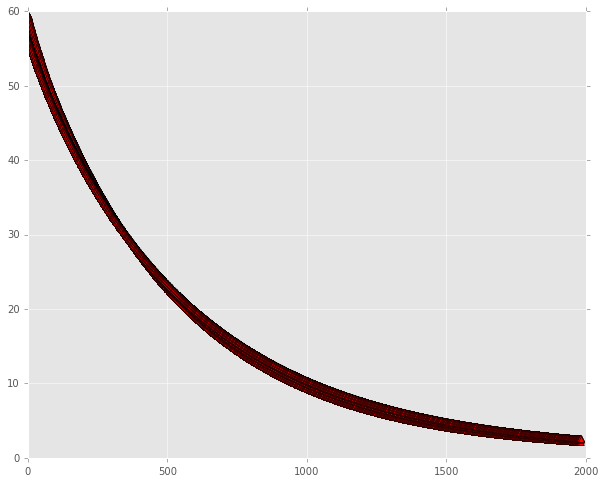

In [118]:
#Now training classifier with following size of training set...

res=[]
trnerror=[]
tsterror=[]
for k in [100,1000,10000,40000,80000,100000,120000]:
    

In [ ]:
plt.plot([100,1000,10000,40000,80000,100000,120000],trnerror)
plt.plot([100,1000,10000,40000,80000,100000,120000],tsterror)
plt.legend(['train','test'])
plt.title('Error Wrt increasing training set')
plt.xlabel('Number of Training Exampels')